In [2]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=a04939106fa2858b27b3ca390a4018e2a7fc4b3ce2995031f480a685eb1142da
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

In [6]:
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
df=pd.read_csv("/content/drive/MyDrive/zoo.data",names=column_names)

In [8]:
X = df.drop(['animal_name', 'class_type'], axis=1)
y = df['class_type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=[str(class_type) for class_type in range(1, 8)])
print(f'Accuracy: {accuracy:.2f}')
print(classification_report_str)


Accuracy: 0.95
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

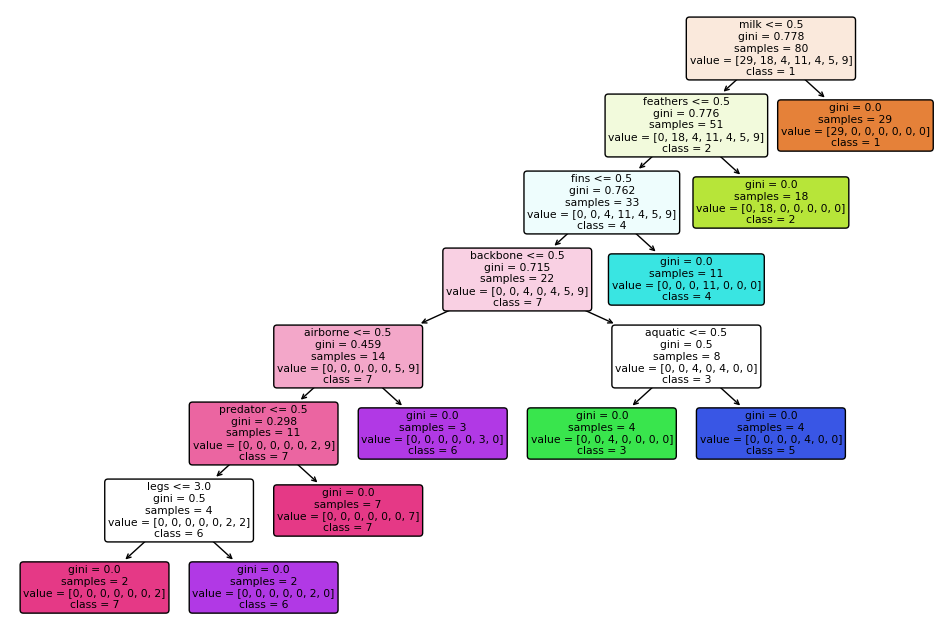

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(class_type) for class_type in range(1, 8)], filled=True, rounded=True)
plt.show()